<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


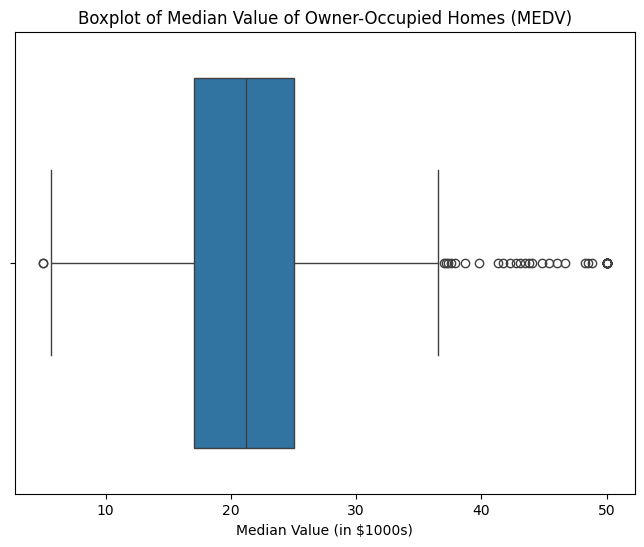

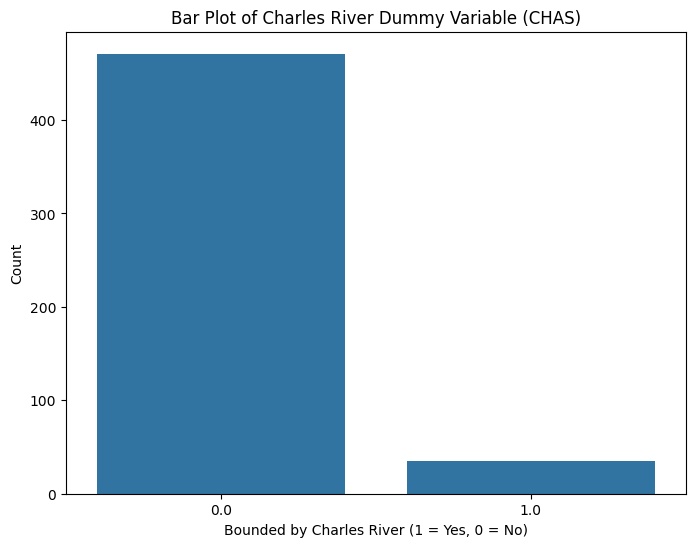

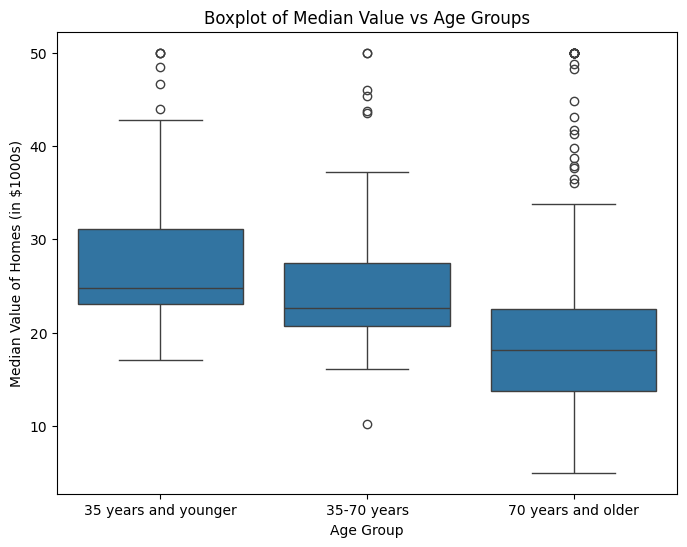

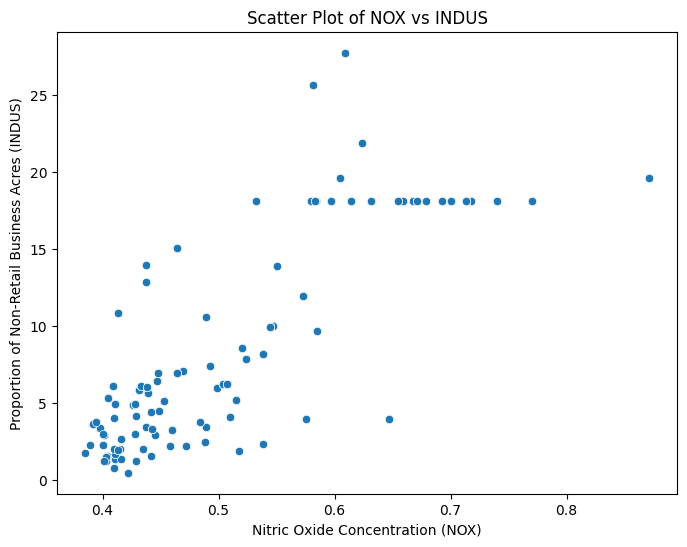

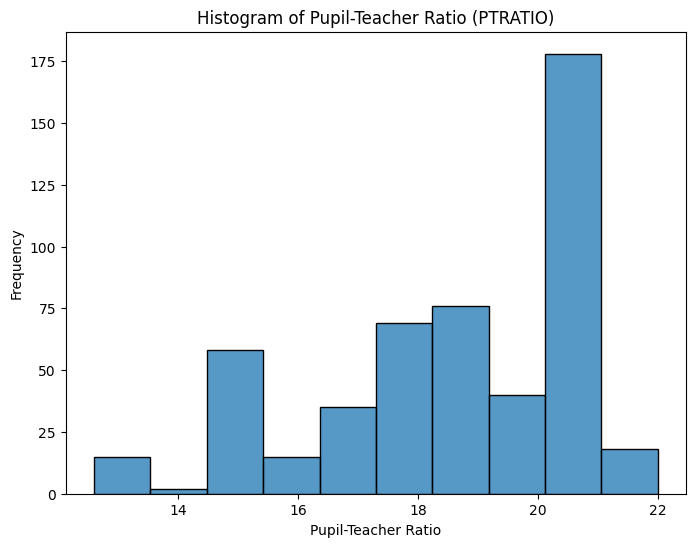

T-test p-value for Charles River:  0.003567170098137517


<ipython-input-13-f49d80e53bbe>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("ANOVA F-statistic p-value for AGE Groups: ", anova_result['PR(>F)'][0])


ANOVA F-statistic p-value for AGE Groups:  1.7105011022701769e-15
Pearson Correlation (NOX vs INDUS):  0.7636514469209192
Pearson p-value:  7.913361061210442e-98
Regression Coefficient (DIS vs MEDV):  1.0916130158411106
R-squared value for regression:  0.062464372121782796


In [13]:
from sklearn.linear_model import LinearRegression

# Boxplot for "Median value of owner-occupied homes" (MEDV)
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value (in $1000s)')
pyplot.show()

# Bar plot for the Charles River variable (CHAS)
pyplot.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Bar Plot of Charles River Dummy Variable (CHAS)')
pyplot.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
pyplot.ylabel('Count')
pyplot.show()

# Boxplot for MEDV vs AGE (Discretize AGE into three groups)
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value vs Age Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Homes (in $1000s)')
pyplot.show()

# Scatter plot for NOX (Nitric oxide concentrations) and INDUS (non-retail business acres)
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Nitric Oxide Concentration (NOX)')
pyplot.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.show()

# Histogram for Pupil-Teacher Ratio (PTRATIO)
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=False)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()


# T-test for the difference in median value of houses bounded by the Charles river
charles_grouped = [boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV']]
t_stat, p_value_ttest = stats.ttest_ind(*charles_grouped, equal_var=False)

# ANOVA for difference in median values of houses for different AGE groups
anova_model = sm.OLS.from_formula('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)

# Pearson correlation between NOX and INDUS
pearson_corr, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Regression analysis to determine the impact of distance (DIS) on MEDV
X = boston_df['DIS'].values.reshape(-1, 1)
y = boston_df['MEDV']

regression_model = LinearRegression()
regression_model.fit(X, y)
regression_coef = regression_model.coef_[0]
r_squared = regression_model.score(X, y)

# Display results
print("T-test p-value for Charles River: ", p_value_ttest)
print("ANOVA F-statistic p-value for AGE Groups: ", anova_result['PR(>F)'][0])
print("Pearson Correlation (NOX vs INDUS): ", pearson_corr)
print("Pearson p-value: ", p_value_corr)
print("Regression Coefficient (DIS vs MEDV): ", regression_coef)
print("R-squared value for regression: ", r_squared)